# Products Performance
- Products categories analysis
- Key metrics anaylysis (`Sales`, `Profit`, `Return Rates`)
- Correlation analysis
- Sales distribution by Highest Unit Price

### 1. Loading data

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine

# Define the connection details
server = 'DESKTOP-D57LVN9\SQLEXPRESS'
database = 'ContosoRetail'
username = 'sa'
password = '281202'

# Create the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Write SQL query
query = "select * from ContosoRetail_df"

# Load data into a pandas DataFrame
df_origin = pd.read_sql(query, engine, index_col='SalesKey')

# No need to explicitly close the engine, but it’s good practice to dispose of it when done
engine.dispose()

### 2. Products Categories Analysis

#### 2.1. Calculating Metrics

In [2]:
# Filtering data
df_cat = df_origin[['ProductCategory','SalesAmount','SalesQuantity','TotalCost','ReturnQuantity']].copy()

# Grouping Metrics
df_cat = df_cat.groupby('ProductCategory')[['SalesAmount','SalesQuantity','TotalCost','ReturnQuantity']].sum().reset_index()

# Profit
df_cat['Profit'] = df_cat['SalesAmount'] - df_cat['TotalCost']

# Return Rates
df_cat['ReturnRates'] = (df_cat['ReturnQuantity'] / df_cat['SalesQuantity']) * 100

### 2.2. Plotting

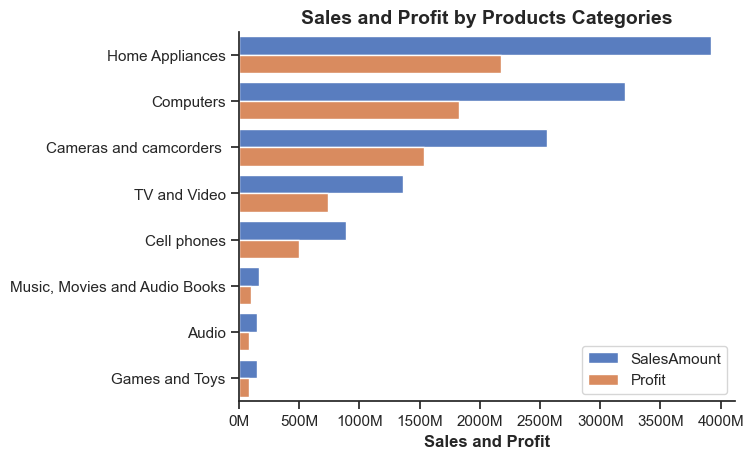

In [3]:
# Melting key Metrics for plotting
df_cat_sales_profit = df_cat.melt(id_vars='ProductCategory', var_name='Metrics', value_name='Amount', value_vars=['SalesAmount','Profit'])

# Plotting Sales and Profit
sns.set_theme(style='ticks')
sns.barplot(
    data=df_cat_sales_profit.sort_values(by='Amount', ascending=False),
    x='Amount',
    y='ProductCategory',
    hue='Metrics',
    palette='muted'
)
sns.despine()

# Formatting
plt.title('Sales and Profit by Products Categories', fontweight='bold', fontsize=14)
plt.xlabel('Sales and Profit', fontweight='bold')
plt.ylabel('')
plt.legend(title=False)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))

plt.show()

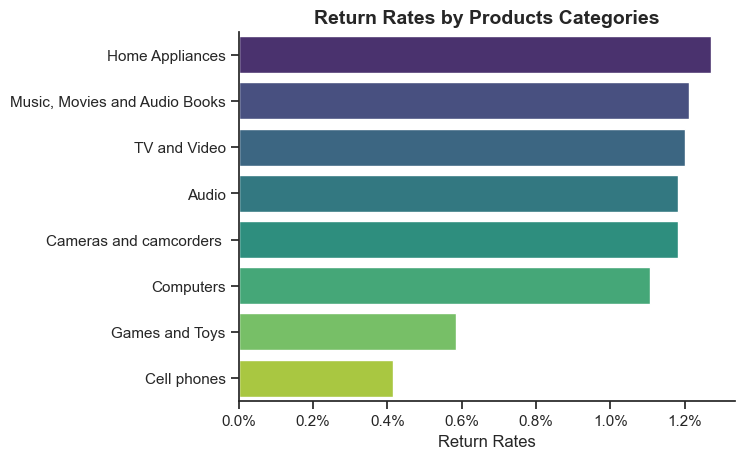

In [4]:
# Plotting Return Rates
sns.set_theme(style='ticks')
sns.barplot(
    data=df_cat.sort_values(by='ReturnRates', ascending=False),
    x='ReturnRates',
    y='ProductCategory',
    hue='ProductCategory',
    palette='viridis'
)
sns.despine()

# Formatting
plt.title('Return Rates by Products Categories', fontweight='bold', fontsize=14)
plt.xlabel('Return Rates')
plt.ylabel('')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.show()

### 3. Calculating key metrics

In [5]:
# Filtering data
df_products = df_origin[['ProductName','SalesAmount','SalesQuantity','TotalCost','ReturnQuantity']].copy()

# Group by calculating
df_products = df_products.groupby('ProductName')[['SalesQuantity','SalesAmount','TotalCost','ReturnQuantity']].sum().reset_index().sort_values(by='SalesAmount',ascending=False).head(10)

# Profit calculating
df_products['Profit'] = df_products['SalesAmount'] - df_products['TotalCost']

# Profit margin = (Profit / SalesAmount) * 100
df_products['ProfitMargin'] = (df_products['Profit'] / df_products['SalesAmount']) * 100

# Return Rates (%) calculating
df_products['ReturnRates'] = (df_products['ReturnQuantity'] / df_products['SalesQuantity']) * 100

df_products

,ProductName,SalesQuantity,SalesAmount,TotalCost,ReturnQuantity,Profit,ProfitMargin,ReturnRates
1943,Proseware Projector 1080p DLP86 White,21092,5.190106e+07,17278905.93,252,3.462215e+07,66.707988,1.194766
1942,Proseware Projector 1080p DLP86 Silver,20942,5.148422e+07,17141462.91,267,3.434276e+07,66.705406,1.274950
1941,Proseware Projector 1080p DLP86 Black,20006,4.926646e+07,16386354.27,245,3.288011e+07,66.739331,1.224633
1946,Proseware Projector 1080p LCD86 White,21040,4.750487e+07,15825028.56,250,3.167984e+07,66.687566,1.188213
806,Contoso Projector 1080p X980 White,21013,4.749955e+07,15799175.64,253,3.170037e+07,66.738260,1.204017
1944,Proseware Projector 1080p LCD86 Black,20745,4.688348e+07,15600716.46,249,3.128276e+07,66.724489,1.200289
805,Contoso Projector 1080p X980 Silver,20717,4.677995e+07,15565738.98,263,3.121421e+07,66.725618,1.269489
804,Contoso Projector 1080p X980 Black,20353,4.593534e+07,15289721.04,271,3.064562e+07,66.714691,1.331499
1945,Proseware Projector 1080p LCD86 Silver,20317,4.588676e+07,15261586.98,270,3.062517e+07,66.740760,1.328936
1495,Litware Refrigerator 24.7CuFt X980 Grey,14528,4.562853e+07,15226879.64,190,3.040165e+07,66.628599,1.307819


### 4. Visualizing key metrics

#### 4.1. Total Sales and Profit

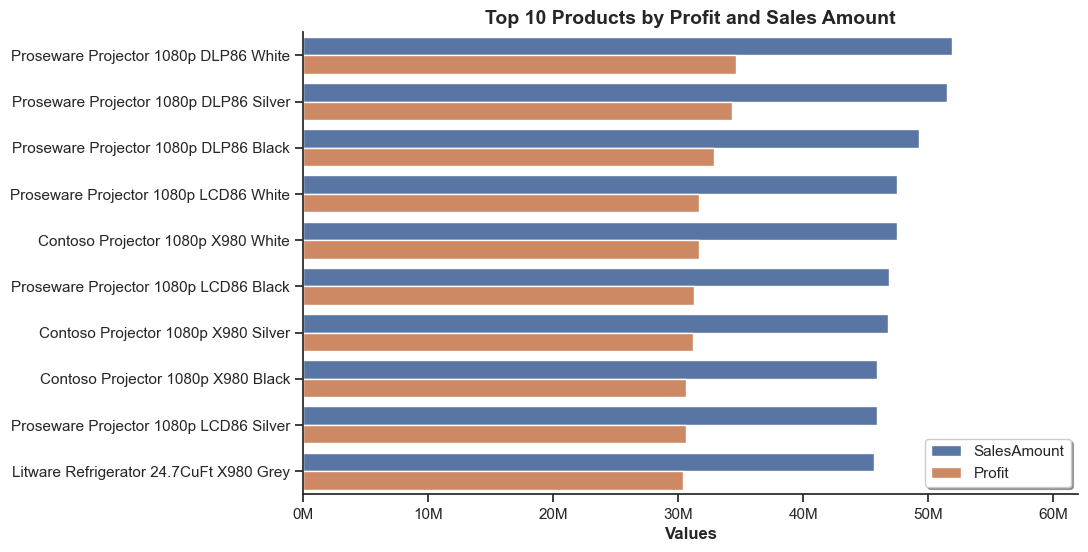

In [6]:
# Melt the DataFrame for visualization
df_sales_profit = df_products.melt(id_vars='ProductName', var_name='Metrics', value_name='Amount', value_vars=['SalesAmount','Profit'])

# Plotting 
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')
sns.barplot(
    data=df_sales_profit,
    x='Amount',
    y='ProductName',
    hue='Metrics'
)
sns.despine()

# Formatting plot
plt.legend(title=False, fancybox=True, loc='lower right', shadow=True, framealpha=1)
plt.title('Top 10 Products by Profit and Sales Amount', fontweight='bold', fontsize=14)
plt.xlabel('Values', fontweight='bold')
plt.ylabel('')
plt.xlim(0,62000000)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))

plt.show()

#### 4.2. Return Rates by Top 10 Sales Amount Products

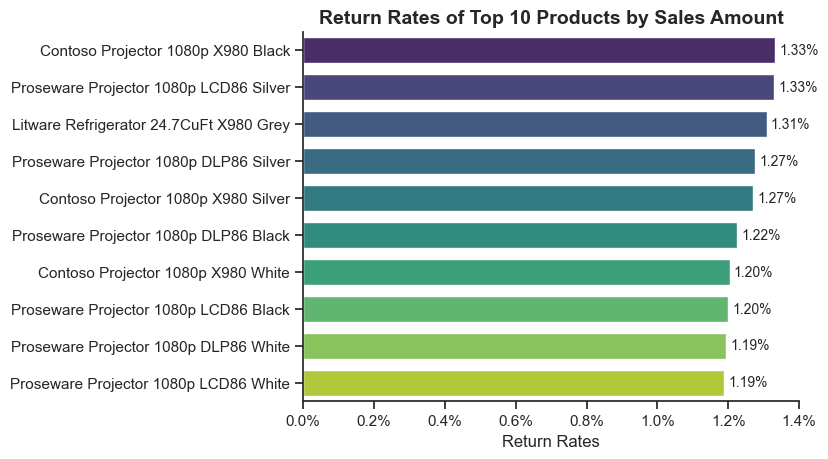

In [7]:
# Plotting Return Rates
sns.set_theme(style='ticks')
sns.barplot(
    data=df_products.sort_values(by='ReturnRates',ascending=False),
    x='ReturnRates',
    y='ProductName',
    hue='ProductName',
    palette='viridis',
    width=0.7
)
sns.despine()

# Formatting plot
plt.title('Return Rates of Top 10 Products by Sales Amount', fontsize=14, fontweight='bold')
plt.xlabel('Return Rates')
plt.ylabel('')
plt.xlim(0,1.4)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Labeling
for i in plt.gca().containers:
    plt.gca().bar_label(i, labels=[f'{x:.2f}%' for x in i.datavalues], padding=3, fontsize=10)

### 5. Correlations Analysis

#### 5.1. Highest Correlations Metrics

In [8]:
# Filtering and grouping data
df_corr = df_origin[['ProductName','SalesAmount','SalesQuantity','TotalCost','ReturnQuantity']].copy()
df_corr = df_corr.groupby('ProductName')[['SalesAmount','SalesQuantity','TotalCost','ReturnQuantity']].sum().reset_index()

# Profit, Profit Margin and Return Rates calculating
df_corr['Profit'] = df_corr['SalesAmount'] - df_corr['TotalCost']
df_corr['ProfitMargin'] = (df_corr['Profit'] / df_corr['SalesAmount']) * 100
df_corr['ReturnRates'] = (df_corr['ReturnQuantity'] / df_corr['SalesQuantity']) * 100

# Correlation Matrix
df_corr = df_corr[['SalesAmount','SalesQuantity','TotalCost','ReturnQuantity','Profit','ProfitMargin','ReturnRates']].corr()

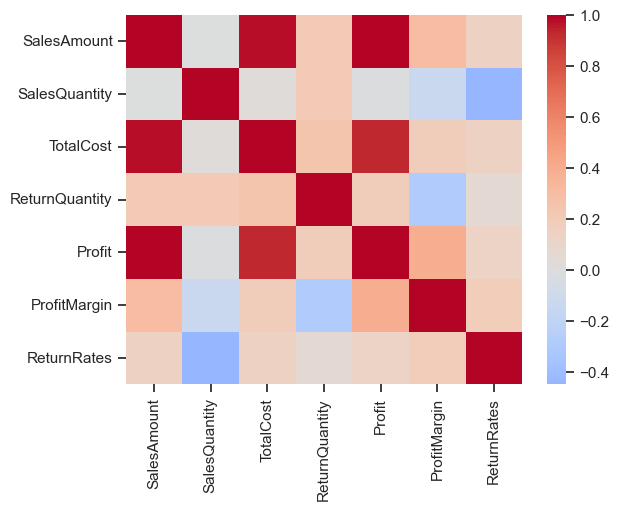

In [9]:
# Plotting correlation matrix
sns.set_theme(style='ticks')
sns.heatmap(
    data=df_corr,
    cmap='coolwarm',
    center=0
)

plt.show()

#### 5.2. Visualizing highest Correlations Metrics

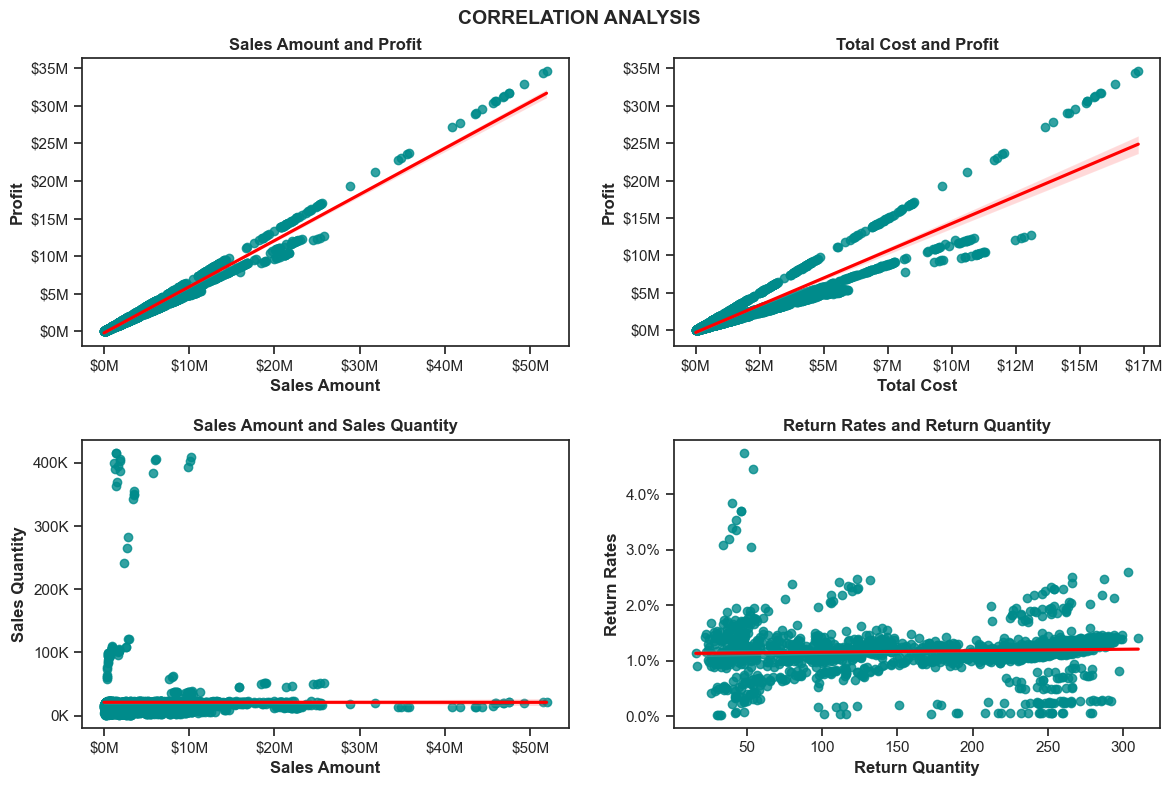

In [10]:
# Filtering and grouping data
df_scatter = df_origin[['ProductName','SalesAmount','SalesQuantity','TotalCost','ReturnQuantity']].copy()
df_scatter = df_scatter.groupby('ProductName')[['SalesAmount','SalesQuantity','TotalCost','ReturnQuantity']].sum().reset_index()

# Profit, Profit Margin and Return Rates calculating
df_scatter['Profit'] = df_scatter['SalesAmount'] - df_scatter['TotalCost']
df_scatter['ProfitMargin'] = (df_scatter['Profit'] / df_scatter['SalesAmount']) * 100
df_scatter['ReturnRates'] = (df_scatter['ReturnQuantity'] / df_scatter['SalesQuantity']) * 100

# Plotting
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax = ax.flatten()

sns.set_theme(style='ticks')

sns.regplot(
    data=df_scatter,
    ax=ax[0],
    x='SalesAmount',
    y='Profit',
    color='darkcyan',
    line_kws={'color': 'red'}
)

sns.regplot(
    data=df_scatter,
    ax=ax[1],
    x='TotalCost',
    y='Profit',
    color='darkcyan',
    line_kws={'color': 'red'}
)

sns.regplot(
    data=df_scatter,
    ax=ax[2],
    x='SalesAmount',
    y='SalesQuantity',
    color='darkcyan',
    line_kws={'color': 'red'}
)


sns.regplot(
    data=df_scatter,
    ax=ax[3],
    x='ReturnQuantity',
    y='ReturnRates',
    color='darkcyan',
    line_kws={'color': 'red'}
)

# Formatting plot
fig.tight_layout(h_pad=3, w_pad=3)
fig.suptitle('CORRELATION ANALYSIS', fontweight='bold', fontsize=14)
fig.subplots_adjust(top=0.92)

ax[0].set_title('Sales Amount and Profit', fontweight='bold')
ax[0].set_xlabel('Sales Amount', fontweight='bold')
ax[0].set_ylabel('Profit', fontweight='bold')
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))

ax[1].set_title('Total Cost and Profit', fontweight='bold')
ax[1].set_xlabel('Total Cost', fontweight='bold')
ax[1].set_ylabel('Profit', fontweight='bold')
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))

ax[2].set_title('Sales Amount and Sales Quantity', fontweight='bold')
ax[2].set_xlabel('Sales Amount', fontweight='bold')
ax[2].set_ylabel('Sales Quantity', fontweight='bold')
ax[2].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000000)}M'))
ax[2].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

ax[3].set_title('Return Rates and Return Quantity', fontweight='bold')
ax[3].set_xlabel('Return Quantity', fontweight='bold')
ax[3].set_ylabel('Return Rates', fontweight='bold')
ax[3].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

### 6. Sales distribution by Highest Sales Quantity

In [11]:
# Top 10 Products by Sales Quantity
top_products = df_origin[['ProductName','SalesQuantity']].drop_duplicates().sort_values(by='SalesQuantity',ascending=False).head(10).set_index('ProductName').index
top_products

Index(['Headphone Adapter for Contoso Phone E130 Black',
       'Headphone Adapter for Contoso Phone E130 White',
       'Contoso Original K1m Li-Ion Standard Battery E170 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Reusable Phone Screen Protector E120',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Contoso Rubberized Snap-On Cover Hard Case Cell Phone Protector E160 Pink',
       'Contoso Touch Stylus Pen E150 Black',
       'Cigarette Lighter Adapter for Contoso Phones E110 White',
       'Contoso Phone Tough Skin Case E140 Silver'],
      dtype='object', name='ProductName')

In [12]:
# Sales Amount by top Products
df_top_quantity_product = df_origin[df_origin['ProductName'].isin(top_products)][['ProductName','SalesAmount']].copy()
df_top_quantity_product

,ProductName,SalesAmount
66,Contoso Original K1m Li-Ion Standard Battery E...,1947.9880
852,Contoso Rubberized Snap-On Cover Hard Case Cel...,568.3260
859,Contoso Rubberized Snap-On Cover Hard Case Cel...,474.0000
1278,Contoso Touch Stylus Pen E150 Black,1198.8000
1629,Contoso Original K1m Li-Ion Standard Battery E...,1055.6000
...,...,...
3404058,Cigarette Lighter Adapter for Contoso Phones E...,2998.8000
3405184,Headphone Adapter for Contoso Phone E130 Silver,3594.9015
3405265,Contoso Rubberized Snap-On Cover Hard Case Cel...,565.0080
3405910,Contoso Rubberized Snap-On Cover Hard Case Cel...,474.0000


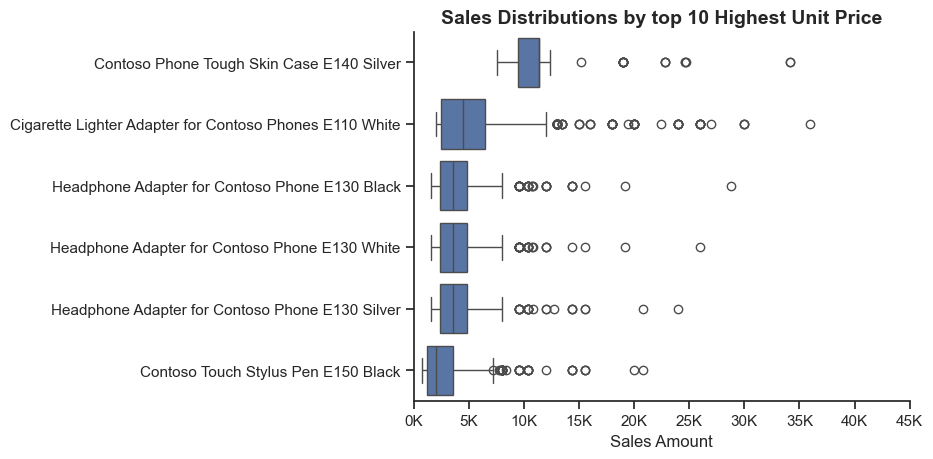

In [13]:
# Ordering
products_order = df_top_quantity_product.groupby('ProductName')['SalesAmount'].mean().to_frame().sort_values(by='SalesAmount', ascending=False).head(6).index

# Plotting
sns.set_theme(style='ticks')
sns.boxplot(
    data=df_top_quantity_product,
    x='SalesAmount',
    y='ProductName',
    order=products_order
)
sns.despine()

# Formatting
plt.xlim(0,45000)
plt.title('Sales Distributions by top 10 Highest Unit Price', fontweight='bold', fontsize=14)
plt.xlabel('Sales Amount')
plt.ylabel('')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.show()